<a href="https://colab.research.google.com/github/yeric1789/CMSC320_Final_Project/blob/main/NoteBookFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [3]:
sns.set_style("darkgrid")

#Loading the data 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/Data_Entry_2017.csv')
data = data.iloc[:4999] # We use a subset 
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


#Data exploration 
Each observation has an image and some more attributes attached to it, we will start by exploring some of the attributes first. 

In [7]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,0.0
mean,7.153431,664.016003,51.809362,2585.575115,2465.156431,0.157476,0.157476,NaN
std,11.211108,395.466319,17.015137,332.878470,392.205703,0.015117,0.015117,NaN
min,0.000000,1.000000,9.000000,1694.000000,1677.000000,0.115000,0.115000,NaN
25%,0.000000,318.000000,40.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,643.000000,54.000000,2500.000000,2500.000000,0.168000,0.168000,NaN
75%,8.000000,1021.500000,64.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,66.000000,1335.000000,94.000000,3056.000000,3056.000000,0.198800,0.198800,NaN


In [8]:
def count_disease(findings):
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [9]:
data['Finding Labels'] = data.apply(lambda x: x['Finding Labels'].split('|'),axis = 1)

# Count the different 
overview = {}
for findings in data['Finding Labels']:
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [10]:
overview

{'Cardiomegaly': 196,
 'Emphysema': 125,
 'Effusion': 487,
 'No Finding': 2754,
 'Hernia': 27,
 'Infiltration': 830,
 'Mass': 161,
 'Nodule': 214,
 'Atelectasis': 460,
 'Pneumothorax': 199,
 'Pleural_Thickening': 165,
 'Pneumonia': 65,
 'Fibrosis': 172,
 'Edema': 90,
 'Consolidation': 205}

Now we can create a one-hot encoding dataframe of all the labels being assigned to each image. After that it can be concatenated with the originial data matrix. 

In [11]:
dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())
for i,des in enumerate(data['Finding Labels']):
  dummies.loc[i][des] = 1

#Concat horizontally
data = pd.concat([data,dummies],axis=1)

<ipython-input-11-9b6e35be31a7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())


Now let's see which diseases are the most common, by plotting a histogram. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

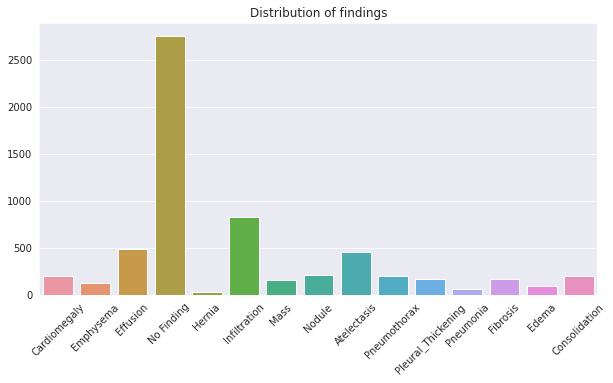

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(overview.keys())
y = list(overview.values())
sns.barplot(x,y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)

Another thing our data accounts for is gender, so we can also vizualize if a Gender would have influence on how frequent a lung disese occurs. 

In [13]:
gender_df = data.groupby('Patient Gender').count()
gender_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
Patient Gender,,,,,,,,,,,,,,,,,,,,,
F,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391,...,2391,2391,2391,2391,2391,2391,2391,2391,2391,2391
M,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608,...,2608,2608,2608,2608,2608,2608,2608,2608,2608,2608


Now we can plot the correlation matrix, to check if any of the findings often occur togehter. Note that we have dropped *'No Finding'* since it will never occur together with any of the other variables. 

Text(0.5, 1.0, 'Correlation matrix of findings')

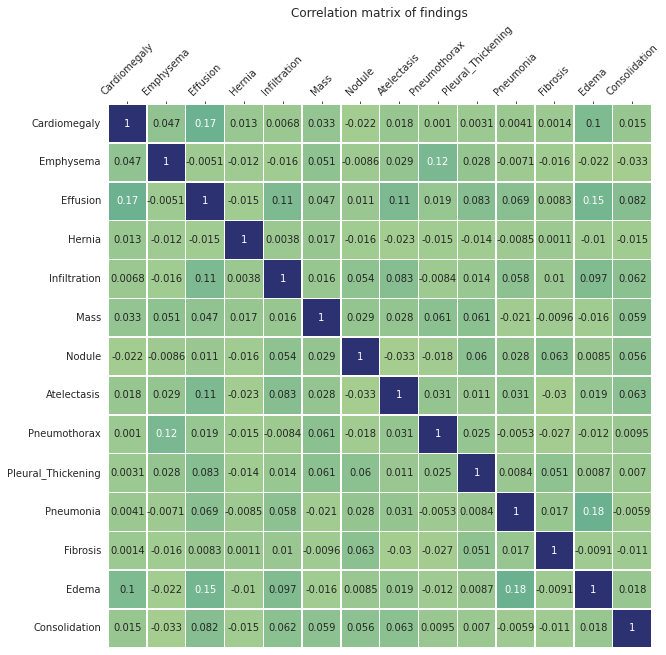

In [14]:
plt.rcParams["figure.figsize"] = (15,10)
df = dummies.drop(columns = 'No Finding').corr()
ax = sns.heatmap(df,annot = True,cmap="crest",square=True, linewidths=.5,cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.title('Correlation matrix of findings')

# Predicting the label from images. 

In [15]:
import torch 
from torchvision import datasets, transforms
from torchvision.models import inception_v3
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from torch import nn
import torch.functional as F
from tqdm.notebook import trange, tqdm
from sklearn.model_selection import train_test_split

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

First let us make sure that we make a trainning set and a testing set


In [18]:
train_df, test_df = train_test_split(data,test_size=0.25, random_state=42)

In order to work with pytorch and the image data, we have to create a costoum data-set. 

In [106]:
class LungDataSet(Dataset):
  
  def __init__(self,df,root_dir,input_size,transform = None):
    self.df = df 
    self.root_dir = root_dir
    self.transform = transform
    self.input_size = input_size

  def __len__(self):
    return len(self.df)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
            idx = idx.tolist()
    
    img_name = self.df.iloc[idx,0]
    path = os.path.join(self.root_dir,img_name)
    #print(path)

    image = io.imread(path)
    image = torch.tensor([transform.resize(image, self.input_size) for i in range(3)]) # This is just me trying stuff 
    labels = self.df.iloc[idx,12:]
    
    labels = torch.tensor(labels.to_list()).to(float)

    sample = {'image': image, 'labels': labels}

    if self.transform:
      sample = self.transform(sample)

    return sample 

In [107]:
dir = '/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/'
train_set = LungDataSet(df = train_df,root_dir = dir,input_size = (299,299))
test_set = LungDataSet(df = test_df,root_dir = dir,input_size = (299,299))

## Visualize the data we will be training on 

/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000877_005.png


<ipython-input-19-21dd5ea84883>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  image = torch.tensor([transform.resize(image, self.input_size) for i in range(3)]) # This is just me trying stuff


0 torch.Size([3, 299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001190_000.png
1 torch.Size([3, 299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000490_002.png
2 torch.Size([3, 299, 299]) torch.Size([15])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001119_000.png
3 torch.Size([3, 299, 299]) torch.Size([15])


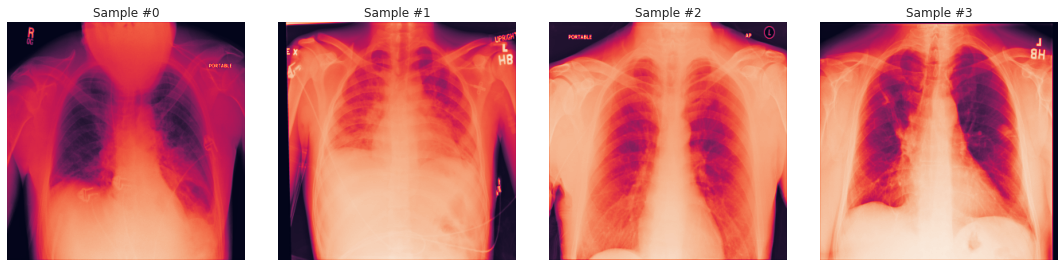

In [21]:
fig = plt.figure()

for i in range(len(train_set)):
    sample = train_set[i]

    print(i, sample['image'].shape, sample['labels'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'][0,:,:])

    if i == 3:
        plt.show()
        break

In [108]:
#Train Loader 
train_dataloader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=0)

#Test Loader
test_dataloader = DataLoader(test_set, batch_size=2, shuffle=True, num_workers=0)

First define the model, and change the linear classifier to be of output features 15. 

In [23]:
#(fc): Linear(in_features=2048, out_features=1000, bias=True)
model = inception_v3(pretrained=True)
model.fc = nn.Linear(in_features=2048, out_features=15, bias=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

Define loss function and the optimizer, we will be using the Adam optimizer. 

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Training loop for the model. 

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, point in tqdm(enumerate(dataloader)):
        X = point['image'].to(torch.float32)
        y = point['labels']

        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X).logits
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [95]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    f = nn.Softmax(dim = 1)
    with torch.no_grad():
        for point in dataloader:
            X = point['image'].to(torch.float32)
            y = point['labels']

            X, y = X.to(device), y.to(device)
            pred = model(X)
            #return pred, y 

            test_loss += loss_fn(pred, y).item()
            print(f'loss:{test_loss} \n Prediction:{f(pred)}')
            correct += ((f(pred) > 0.5 - y).sum().item()) == 0
    test_loss /= num_batches
    correct /= size
    print(correct)

In [103]:
epochs = 5
for t in tqdm(range(epochs)):
  #train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)
  

  0%|          | 0/5 [00:00<?, ?it/s]

/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001199_006.png
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00000372_015.png
loss:4.452686965465546 
 Prediction:tensor([[2.4695e-03, 1.4707e-02, 1.2146e-01, 5.8267e-01, 4.8375e-03, 1.1352e-01,
         3.7705e-03, 2.2011e-02, 6.9148e-02, 1.4090e-02, 8.1927e-03, 4.3061e-03,
         2.7638e-02, 5.4358e-03, 5.7441e-03],
        [2.0298e-04, 2.4469e-03, 4.6894e-02, 8.2580e-01, 4.1654e-04, 7.4624e-02,
         2.8733e-04, 4.9648e-03, 3.1041e-02, 2.3762e-03, 7.3979e-04, 3.3988e-04,
         8.8094e-03, 5.6940e-04, 4.8470e-04]])
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001226_004.png
/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/images/00001283_000.png
loss:5.718530178070068 
 Prediction:tensor([[1.2134e-02, 3.0221e-02, 1.1010e-01, 3.5105e-01, 1.8750e-02, 1.2618e-01,
         1.6792e-02, 5.5389e-02, 1.0103e-01, 3.6020e-02, 2.712

KeyboardInterrupt: ignored

In [109]:
for batch, point in tqdm(enumerate(test_dataloader)):
  X = point['image'].to(torch.float32)
  if len(X.shape) == 5:
    print(X.shape)

0it [00:00, ?it/s]

RuntimeError: ignored